# Contenido <a id='back'></a>

* [Introducción](#intro)
* [Etapa 1. Inicialización](#inicializacion)
* [Etapa 2. Cargar los datos](#cargar)
* [Etapa 3. Preparar los datos](#preparar)
    * [Visits](#visits)
     * [Corregir datos](#corregir_visits)
    * [Orders](#orders)
     * [Corregir datos](#corregir_orders)
    * [Costs](#costs)
     * [Corregir datos](#corregir_costs)
* [Etapa 4. Analizar los datos](#analizar)
    * [Producto](#producto)
     * [Conclusiones Producto](#conclu_productos)
    * [Ventas](#ventas)
     * [Conclusiones Ventas](#conclu_ventas)
    * [Marketing](#marketing)
     * [Conclusiones Marketing](#conclu_marketing)
* [Etapa 5. Conclusiones generales](#general)
* [Etapa 6. Recomendaciones](#recomendaciones)

# ¿Cómo optimizar los gastos de marketing? <a id='intro'></a>

Se te ha ido muy bien en el curso Practicum y te han ofrecido hacer prácticas en el
departamento analítico de Y.Afisha. Tu primera tarea es ayudar a optimizar los
gastos de marketing.

Lo que vas a investigar:

- Cómo la gente usa el producto
- Cuándo empiezan a comprar
- Cuánto dinero trae cada cliente
- Cuándo pagan


Este proyecto tiene como propósito determinar cuanto dinero invertir en marketing y donde invertirlo, es decir, en que fuentes o plataformas, para así brindar las mejores recomendaciones al equipo de marketing de la compañía. La información con la que se cuenta para el estudio son los Registros del servidor con datos sobre las visitas a Y.Afisha desde junio de
2017 hasta mayo de 2018, un archivo de volcado con todos los pedidos del período y otro con las Estadísticas de gastos de marketing. Se van a tratar los valores ausentes, corregir los tipos de datos, hacer comprobaciones con los datos límpios, estudiar comportamientos de los usuarios para determinar:

- Cómo la gente usa el producto
- Cuándo empiezan a comprar
- Cuánto dinero trae cada cliente
- Cuándo pagan

Por último se van a escribir las conclusiones del estudio y a redactar las recomendaciones para el departamento de marketing de la compañía.

## Inicialización <a id='inicializacion'></a>

In [32]:
# Cargar todas las librerías

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#Cargando drive, ya que el proyecto fue realizado en Google Colab y el archivo se encuentra en Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [33]:
# Carga el archivo de datos en un DataFrame
try:
  #leyendo mi archivo que se encuentra en Google Drive
  visits = pd.read_csv('gdrive/My Drive/Education/Practicum/Sprint 7/Project 7/visits_log_us.csv')
  orders = pd.read_csv('gdrive/My Drive/Education/Practicum/Sprint 7/Project 7/orders_log_us.csv')
  costs = pd.read_csv('gdrive/My Drive/Education/Practicum/Sprint 7/Project 7/costs_us.csv')

except:
  #leyendo el archivo para el revisor de código de Practicum
  visits= pd.read_csv('/datasets/visits_log_us.csv')
  orders= pd.read_csv('/datasets/orders_log_us.csv')
  costs= pd.read_csv('/datasets/costs_us.csv')


## Preparar los datos <a id='preparar'></a>

### Visits<a id='visits'></a>

In [34]:
# Información general/resumen sobre el DataFrame de visits

visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [35]:
# Comprobar si hay duplicados

print(visits.duplicated().sum())
duplicated_visits= visits[visits.duplicated()]

0


In [36]:
# Muestra de los datos de visits

visits.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [37]:
# Verificar distribución de Device

visits.groupby('Device')['Device'].describe()

,count,unique,top,freq
Device,,,,
desktop,262567,1,desktop,262567
touch,96833,1,touch,96833


In [38]:
#Verificar la distribución de Source Id

visits['Source Id'].value_counts()

4     101794
3      85610
5      66905
2      47626
1      34121
9      13277
10     10025
7         36
6          6
Name: Source Id, dtype: int64

In [39]:
# Verificar máximo y mínimo de End Ts

print(visits['End Ts'].min())
print(visits['End Ts'].max())

2017-06-01 00:02:00
2018-06-01 01:26:00


In [40]:
# Verificar máximo y mínimo de Start Ts

print(visits['Start Ts'].min())
print(visits['Start Ts'].max())

2017-06-01 00:01:00
2018-05-31 23:59:00


In [41]:
visits[visits['End Ts'] > '2018-06-01']

,Device,End Ts,Source Id,Start Ts,Uid
2330,desktop,2018-06-01 00:05:00,2,2018-05-31 23:30:00,5300693976971713685
43215,desktop,2018-06-01 00:13:00,4,2018-05-31 23:46:00,12296626599487328624
46667,desktop,2018-06-01 00:13:00,5,2018-05-31 23:48:00,1107134732939577311
154728,desktop,2018-06-01 00:09:00,2,2018-05-31 22:52:00,12484396335714047199
198329,desktop,2018-06-01 00:11:00,3,2018-05-31 23:59:00,3720373600909378583
216791,touch,2018-06-01 00:06:00,5,2018-05-31 23:45:00,9951896961656595558
263781,desktop,2018-06-01 00:25:00,1,2018-05-31 23:59:00,4906562732540547408
269213,touch,2018-06-01 00:12:00,10,2018-05-31 23:59:00,10723414689244282024
288563,touch,2018-06-01 00:01:00,4,2018-05-31 23:37:00,1094281763368510391
299620,desktop,2018-06-01 00:04:00,4,2018-05-31 23:59:00,83872787173869366


El dataset visits contiene los siguientes campos:

- `Devise` — dispositivo del usuario
- `End Ts` — fecha y hora de término de la sesión        
- `Source Id`  — identificador de la fuente de anuncios de la que proviene el usuario     
- `Start Ts` — fecha y hora de inicio de la sesión       
- `Uid`  — identificador único del usuario  

Tenemos a nuestra disposición un conjunto de datos compuesto por 5 columnas y 359,400 filas. Se requiere realizar ajustes en los tipos de datos de las columnas "End Ts" y "Start Ts". Asimismo, se procederá a modificar los nombres de las columnas para que únicamente contengan letras minúsculas y se eliminarán los espacios entre las palabras. Cabe destacar que el conjunto de datos no presenta valores ausentes ni duplicados.

En relación a la columna "Device", se identifican dos tipos: "desktop" con 262,567 registros de inicio de sesión y "touch" con 96,833 registros.

Al examinar la distribución de la columna "Source Id", se observa la presencia de 10 tipos diferentes. Entre ellos, se destaca el número 4, el cual cuenta con 101,794 entradas y muestra los resultados más favorables. Por otro lado, los números 6 y 7 muestran los resultados más deficientes, con tan solo 6 y 36 entradas, respectivamente.

Al analizar los valores máximos y mínimos de las columnas "End Ts" y "Start Ts", se revela que el rango de fechas abarca desde el 1 de junio de 2017 hasta el 31 de mayo de 2018. Sin embargo, en la columna "End Ts" se registran 11 visitas con fecha 1 de junio de 2018, las cuales corresponden a inicios de sesión que tuvieron lugar el 31 de mayo de 2018 y culminaron después de las 00:00:00. Asimismo, se registra una sesión que finalizó exactamente a las 00:00:00. Dado que esta información resulta relevante para el análisis, se conservan todos los datos disponibles.

### Corregir datos Visits<a id='corregir_visits'></a>

In [42]:
# Cambiar nombre de las columnas

visits.columns=['device','end_ts','source_id','start_ts','uid']

In [43]:
# cambiar tipos de datos

visits['end_ts'] = pd.to_datetime(visits['end_ts'], format='%Y-%m-%d %H:%M:%S')
visits['start_ts'] = pd.to_datetime(visits['start_ts'], format='%Y-%m-%d %H:%M:%S')
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  object        
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB


In [44]:
# comprobar la tabla
visits.head()

,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


### Orders <a id='orders'></a>

In [45]:
# Información general/resumen sobre el DataFrame de orders

orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [46]:
# Comprobar si hay duplicados

print(orders.duplicated().sum())
duplicated_orders= orders[orders.duplicated()]

0


In [47]:
# Muestra de los datos de orders

orders.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [48]:
# Verificar máximo y mínimo de Buy Ts

print(orders['Buy Ts'].min())
print(orders['Buy Ts'].max())

2017-06-01 00:10:00
2018-06-01 00:02:00


In [49]:
orders[orders['Buy Ts'] > '2018-06-01']

,Buy Ts,Revenue,Uid
50414,2018-06-01 00:02:00,3.42,83872787173869366


El dataset orders contiene los siguientes campos:

- `Buy Ts` — fecha y hora del pedido
- `Revenue` — Ingresos de Y.Afisha de este pedido        
- `Uid`  — identificador único del usuario que realiza un pedido     

Contamos con un conjunto de datos compuesto por 3 columnas y 50,415 filas. Se requiere ajustar el tipo de datos en la columna "Buy Ts" y también modificar los nombres de las columnas para que únicamente contengan letras minúsculas y no presenten espacios entre las palabras. Es importante destacar que este conjunto de datos no presenta valores ausentes ni duplicados.

Se ha llevado a cabo una verificación del rango de fechas de los datos mediante el cálculo de los valores máximo y mínimo en la columna "Buy Ts". Los resultados indican que las compras registradas abarcan el período desde el 1 de junio de 2017 hasta el 1 de junio de 2018. Es relevante señalar que las compras realizadas el 1 de junio de 2018 corresponden a un inicio de sesión que tuvo lugar el 31 de mayo de 2018, con un Uid específico identificado como 83872787173869366. Dado que esta información es significativa, se opta por conservar todos los datos en el conjunto.


### Corregir datos Orders <a id='corregir_orders'></a>

In [50]:
# Cambiar nombre de las columnas

orders.columns=['buy_ts','revenue','uid']

In [51]:
# cambiar tipos de datos

orders['buy_ts'] = pd.to_datetime(orders['buy_ts'], format='%Y-%m-%d %H:%M:%S')
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


### Costs <a id='costs'></a>

In [52]:
# Información general/resumen sobre el DataFrame de costs

costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [53]:
# Comprobar si hay duplicados

print(costs.duplicated().sum())
duplicated_costs= costs[costs.duplicated()]

0


In [54]:
# Muestra de los datos de costs

costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [55]:
#Verificar la distribución de Source Id

costs.groupby('source_id')['costs'].describe()


,count,mean,std,min,25%,50%,75%,max
source_id,,,,,,,,
1,363.0,57.391928,27.813968,5.80,36.2500,54.71,75.630,245.75
2,363.0,117.922975,53.971467,15.08,77.8550,115.97,149.160,507.09
3,363.0,389.315785,209.480437,39.26,226.4800,353.14,504.045,1788.28
4,363.0,168.246832,137.033287,0.83,59.5150,130.07,254.385,788.03
5,364.0,142.189835,65.289628,0.70,92.4975,137.30,180.350,719.22
9,363.0,15.199697,6.829491,1.85,9.7950,14.49,19.975,49.53
10,363.0,16.039917,9.440731,0.54,9.1500,14.67,21.495,68.11


In [56]:
# Verificar máximo y mínimo de dt

print(costs['dt'].min())
print(costs['dt'].max())

2017-06-01
2018-05-31


El dataset costs contiene los siguientes campos:

- `source_id` — identificador de la fuente de anuncios
- `dt` — fecha        
- `costs`  — gastos en esta fuente de anuncios en este día     

Contamos con un conjunto de datos compuesto por 3 columnas y 2,542 filas. En este caso, solo es necesario ajustar el tipo de datos de la columna "dt", y cabe destacar que el conjunto de datos no presenta valores ausentes ni duplicados.

Se llevó a cabo un análisis de la distribución de los costos en relación al campo "source_id". Se observa que el número de gastos registrados para cada una de las fuentes es de 363, excepto para la fuente número 5, que cuenta con 364 gastos. Además, se identifican diferencias significativas en los montos de gastos entre las diferentes fuentes. Específicamente, la fuente número 3 es la que presenta una mayor inversión, mientras que las fuentes 9 y 10 registran inversiones muy bajas, con valores de 14.49 y 14.67, respectivamente.

Al analizar la distribución de los datos, se observa que la media es mayor que la mediana en todos los casos. Esto sugiere que los datos están sesgados hacia la derecha. Por lo tanto, para este estudio y estudios posteriores, se optará por utilizar la mediana como medida central.

Además, se realizó una verificación del rango de fechas de los datos a través del cálculo de los valores máximo y mínimo en la columna "dt". Los resultados indican que los gastos se realizaron en el período comprendido entre el 1 de junio de 2017 y el 31 de mayo de 2018, lo cual concuerda correctamente con la información del conjunto de datos.

### Corregir datos Costs <a id='corregir_costs'></a>

In [57]:
# cambiar tipos de datos

costs['dt'] = pd.to_datetime(costs['dt'], format='%Y-%m-%d')
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


## Analizar los datos <a id='analizar'></a>

### Producto <a id='producto'></a>

In [58]:
visits.head()

,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [59]:
# Cantidad de personas que se conectan cada día, semana y mes

visits['session_year']= visits['start_ts'].dt.year
visits['session_month']= visits['start_ts'].astype('datetime64[M]')
visits['session_week']= visits['start_ts'].astype('datetime64[W]')
visits['session_date']= visits['start_ts'].dt.date

dau_total = visits.groupby('session_date').agg({'uid':'nunique'}).mean()
wau_total = visits.groupby(['session_year', 'session_week']).agg({'uid':'nunique'}).mean()
mau_total = visits.groupby(['session_year', 'session_month']).agg({'uid':'nunique'}).mean()

print('DAU:', int(dau_total))
print('WAU:', int(wau_total))
print('MAU:', int(mau_total))


DAU: 907
WAU: 1
MAU: 1


Se puedo determinar que el número promedio de usuarios únicos diarios es de 907 (DAU), mientras que el número promedio de usuarios únicos semanales (WAU) fue de 5621 y el promedio mensual (MAU) fue de 23228, es decir la plataforma tiene ingresos constantes de usuarios únicos durante todo el mes.

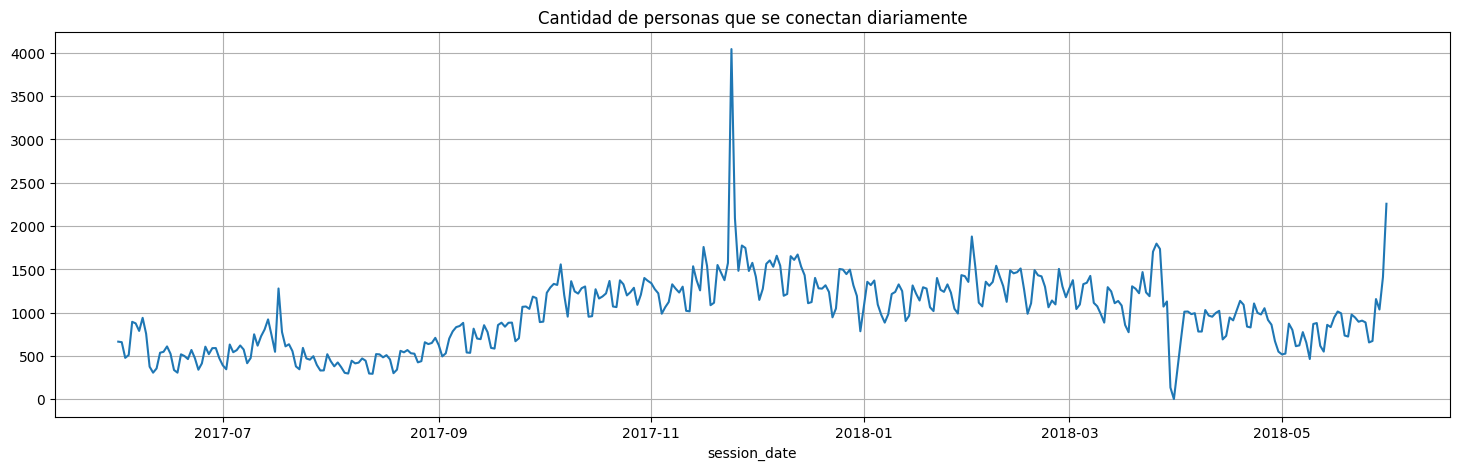

In [60]:
# session_date a lo largo del tiempo

visits_date= visits.groupby('session_date')['uid'].count()
visits_date.plot(x='session_date', y='uid',
                title= 'Cantidad de personas que se conectan diariamente', grid=True,
                figsize=(18,5))
plt.show()

Se puede observar un incremento muy grande en los inicios de sesión en los días de fines de noviembre, una baja muy importante en los últimos días de marzo y el último día del mes de mayo aumentan los inicios de sesión.

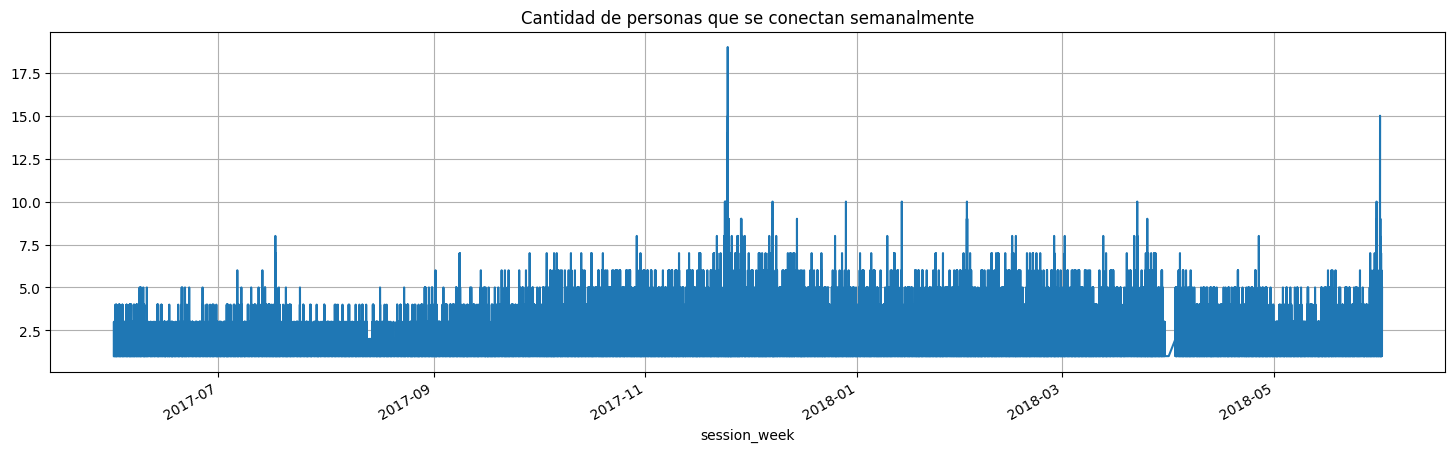

In [61]:
# session week a lo largo del tiempo

visits_week= visits.groupby('session_week')['uid'].count()
visits_week.plot(x='session_week', y='uid',
                title= 'Cantidad de personas que se conectan semanalmente', grid=True,
                figsize=(18,5))
plt.show()

Durante el mes de agosto los inicios de sesión empiezan a crecer durante todas las semanas y se puede ubicar el punto mas alto cerca de la tercera semana de junio, también una caída importante en la cuarta semana de marzo así como en la última semana de mayo.

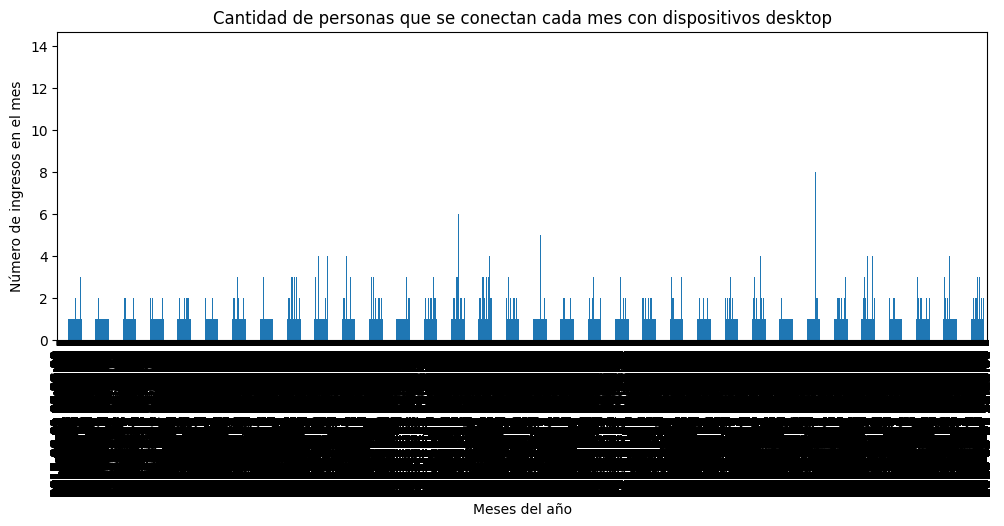

In [ ]:
# Cuantas personas se conectan con cada dispositivo
subconjunto_device= visits.groupby(['device','session_month']).agg({'uid':'nunique'}).reset_index()
subconjunto_device_1= subconjunto_device[(subconjunto_device['device']=='desktop')]
subconjunto_device_desktop= subconjunto_device_1.groupby('session_month')['uid'].mean()
subconjunto_device_desktop.plot(kind='bar',title= 'Cantidad de personas que se conectan cada mes con dispositivos desktop',
                               figsize=(12,4))
plt.ylabel('Número de ingresos en el mes')
plt.xlabel('Meses del año')
plt.show()

Tras el análisis realizado, se ha determinado que en el caso de los dispositivos desktop, durante los meses de junio, julio y agosto de 2017, se registraron visitas notablemente inferiores en comparación con los demás meses del año, situándose por debajo de las 10,000 visitas. A partir de septiembre de 2017, se observó un incremento progresivo en el número de visitas, alcanzando su punto máximo en noviembre de ese mismo año, con casi 25,000 inicios de sesión registrados. A partir de ese momento, se evidenció una tendencia descendente hasta mayo de 2018, con aproximadamente 15,000 inicios de sesión.

Como conclusión, se puede afirmar que durante los meses más cálidos del año, se produce una disminución en los ingresos a la plataforma, mientras que en los meses más fríos se experimenta un aumento.

In [ ]:
subconjunto_device_1= subconjunto_device[(subconjunto_device['device']=='touch')]
subconjunto_device_touch= subconjunto_device_1.groupby('session_month')['uid'].mean()
subconjunto_device_touch.plot(kind='bar',title= 'Cantidad de personas que se conectan cada mes con dispositivos touch',
                               figsize=(12,4))
plt.ylabel('Número de ingresos en el mes')
plt.xlabel('Meses del año')
plt.show()

Se pudo determinar que para los dispositivos touch que en los meses de Junio, Julio y agosto de 2017 las visitas fueron mas bajas en comparación con el resto de los meses del año, estuvieron cercanos a los 4000, a partir de septiembre de 2017 los valores comienzan a aumentar y a partir de octubre de 2017 suben drasticamente hasta llegar a más de 8000 visitas y se mantiene bastante estables muy cercanos a ese número hasta marzo de 2018, en abril y mayo de 2018 se ubica entre las 6000 y 7000 visitas.

Se concluye que en los meses más calidos los ingresos a la plataforma disminuyen, mientras que en los meses más frios aumentan.

In [ ]:
# determinar cuántas sesiones hay por día

total_sessions_day = visits.groupby('session_date').agg({'uid':'count'}).mean()
print('La cantidad de sesiones promedio por día es de:', total_sessions_day[0])

In [ ]:
# Sesiones al día por usuario

total_sessions_day_uid_mean = visits.groupby(['session_date','uid']).agg({'uid':'ninique','uid':'count'}).mean()
print('Sesiones al día por usuario:', total_sessions_day_uid_mean[0])

In [ ]:
# Sesiones al día por usuario a lo largo del tiempo.

total_sessions_day_uid = visits.groupby(['session_date','uid']).agg({'uid':'count'})
total_sessions_day_uid.columns= ['n_sessions']
total_sessions_day_uid= total_sessions_day_uid.reset_index()
sub_sessions_day_uid= total_sessions_day_uid[['session_date','n_sessions']]
total=total_sessions_day_uid.groupby('session_date')['n_sessions'].mean()
total.plot(x='session_date', y='n_sessions',
                title= 'Sesiones al día por usuario a lo largo del tiempo.', grid=True,
                figsize=(18,5))
plt.show()

En la mayoría de los días los inicios de sesión por persona están en promedio entre 1.05 y 1.10, se observan algunos valores inusuales a finales de marzo de 2018 con un promedio que baja hasta 1 mientras que a finales de noviembre de 2017 hay una suba inusual por encima de 1.20 por persona.

In [ ]:
# determinar la duración de cada sesión en segundos (ASL)

visits['session_duration'] = (visits['end_ts'] - visits['start_ts']).dt.seconds

# verificar la distribución

visits['session_duration'].hist(bins=60)

Ya que la distribución de los datos no es normal se calculará la moda para determinar la duración promedio de la sesión.

In [ ]:
 print('La duración promedio de una sesión es de:',visits['session_duration'].mode()[0])

In [ ]:
# determinar la frecuencia con la que los usuarios regresan

sticky_wau= dau_total / wau_total * 100
sticky_mau= dau_total / mau_total * 100
print('El factor de adherencia semanal es de: '"%.3f%%" % sticky_wau)
print('El factor de adherencia mensual es de: '"%.3f%%" % sticky_mau)

In [ ]:
# determinar la frecuencia con la que los usuarios regresan

first_session_date= visits.groupby(['uid'])['start_ts'].min()
first_session_date.name = 'first_session_month'

visits= visits.join(first_session_date, on='uid')
visits['activity_month'] = visits['start_ts'].astype('datetime64[M]')
visits['first_session_month'] = visits['first_session_month'].astype('datetime64[M]')


visits['cohort_lifetime'] = (
   visits['activity_month'] - visits['first_session_month']
)

visits['cohort_lifetime'] = ((visits['activity_month'] - visits['first_session_month']) / np.timedelta64(1, 'M')).round().astype('int')

cohorts= (
visits.groupby(['first_session_month','cohort_lifetime'])
    .agg({'uid':'nunique'})
    .reset_index()
)


initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0] [
    ['first_session_month','uid']
]

initial_users_count = initial_users_count.rename(
    columns={'uid': 'cohort_users'}
)

cohorts = cohorts.merge(initial_users_count, on='first_session_month')
cohorts['retention'] = cohorts['uid'] / cohorts['cohort_users']

retention_pivot = cohorts.pivot_table(
    index='first_session_month',
    columns='cohort_lifetime',
    values='retention',
    aggfunc='sum',
) # Compila una tabla dinámica

plt.figure(figsize=(17, 12))
plt.title('frecuencia con la que los usuarios regresan')
sns.heatmap(
    retention_pivot,
    annot=True,
    fmt='.1%',
    linewidths=1,
    linecolor='gray',
    vmax=0.1,
    cbar_kws= {'orientation': 'horizontal'},
)

- La frecuencia con la que los usuarios regresan en el segundo mes de su ciclo de vida se encuentra entre 4.2% (Cohorte Marzo) y 8.5%(Cohorte septiembre)
- Todas las cohortes bajan su frecuencia a partir del tercer mes de su ciclo de vida.
- La cohorte de junio llega a su ultimo mes de su ciclo de vida con 4.5%, buenos números en comparación con las otras cohortes.

#### Conclusiones Producto <a id='conclu_producto'></a>

A continuación se presentan los hallazgos y conclusiones derivadas del análisis de la plataforma:

- En cuanto a la cantidad de usuarios únicos, se observa una consistencia a lo largo del mes, con un promedio diario (DAU) de 907 usuarios únicos, un promedio semanal (WAU) de 5,621 y un promedio mensual (MAU) de 23,228.

- Se evidencia un aumento significativo en los inicios de sesión durante los últimos días de noviembre, una disminución notable hacia finales de marzo y un incremento en el último día de mayo.

- Durante el mes de agosto, se registra un crecimiento constante en los inicios de sesión a lo largo de las semanas, alcanzando su punto máximo cerca de la tercera semana de junio. Además, se observa una caída significativa en la cuarta semana de marzo y en la última semana de mayo.

- Es importante destacar que algunas personas se conectan más de una vez, dado que el promedio diario de inicios de sesión es de 987, mientras que el promedio por persona es de 1.08.

- En relación a los dispositivos desktop, se detecta que en los meses de junio, julio y agosto de 2017 las visitas fueron más bajas en comparación con el resto del año, registrando cifras por debajo de las 10,000. A partir de septiembre de 2017, las visitas comienzan a aumentar hasta alcanzar su punto máximo en noviembre de 2017, con casi 25,000 inicios de sesión. Luego de ese período, los valores van disminuyendo hasta mayo de 2018, con alrededor de 15,000 inicios de sesión. Se concluye que durante los meses más cálidos, los ingresos a la plataforma disminuyen, mientras que en los meses más fríos aumentan.

- Para los dispositivos touch, se identifica que en los meses de junio, julio y agosto de 2017 las visitas fueron cercanas a 4,000, pero a partir de septiembre de 2017, los valores comienzan a aumentar y a partir de octubre de 2017 se produce un incremento drástico, llegando a más de 8,000 visitas y manteniéndose estables en ese rango hasta marzo de 2018. En abril y mayo de 2018, el número de visitas se sitúa entre 6,000 y 7,000. Al igual que en el caso de los dispositivos desktop, se concluye que los ingresos a la plataforma disminuyen en los meses más cálidos y aumentan en los meses más fríos.

- En la mayoría de los días, los inicios de sesión por persona se sitúan en un promedio entre 1.05 y 1.10. Sin embargo, se observan algunos valores inusuales a finales de marzo de 2018 con un promedio que desciende hasta 1, mientras que a finales de noviembre de 2017 se registra un aumento inusual por encima de 1.20 por persona.

- Los mejores meses para la plataforma, considerando el dispositivo utilizado para acceder a ella, fueron enero, febrero, marzo, octubre, noviembre y diciembre.

- Se obtuvo la mayor cantidad de ingresos a través de dispositivos desktop, con más de 20,000 ingresos en los mejores meses y cerca de 10,000 en los meses de menor actividad.

- La duración promedio de una sesión es de 60 segundos.

- En relación a la frecuencia con la que los usuarios regresan en el segundo mes de su ciclo de vida, se observa que oscila entre el 4.2% (Cohorte de marzo) y el 8.5% (Cohorte de septiembre). Todas las cohortes presentan una disminución en su frecuencia a partir del tercer mes de su ciclo de vida.

- La cohorte de junio alcanza el último mes de su ciclo de vida con un 4.5% de frecuencia, lo cual muestra buenos números en comparación con las demás cohortes.

### Ventas <a id='ventas'></a>

In [ ]:
orders.head()

In [ ]:
# Cuándo empiezan a comprar

orders['order_month']= orders['buy_ts'].astype('datetime64[M]')

first_visits= visits.groupby('uid').agg({'start_ts':'min'}).reset_index()
first_visits.columns= ['uid', 'first_session_dt']


In [ ]:
first_orders = orders.groupby('uid').agg({'buy_ts':'min'}).reset_index()
#first_orders = orders.groupby(['uid','buy_ts']).agg({'buy_ts':'min'}).reset_index()
first_orders.columns = ['uid','first_order_td']

# Integración órdenes y visitas
buyers = pd.merge(first_visits, first_orders, on='uid')
#buyers['first_session_dt']= buyers['start_ts'].astype('datetime64[M]')
#buyers['first_order_td']= buyers['buy_ts'].astype('datetime64[M]')

buyers['days_to_first_purchase'] = ((buyers['first_order_td'] - buyers['first_session_dt']) / np.timedelta64(1,'D')).astype('int')


In [ ]:
buyers['days_to_first_purchase'].plot(kind='hist',title= 'Time from visit to orde', bins=100,
                               figsize=(12,7))
plt.ylabel('Time from visit to order')
plt.xlabel('Days')
plt.xlim(0,100)
plt.show()

Podemos concluir que la gran mayoría de clientes realiza su primera compra el mismo día o en los primeros días que se registran en Y.Afisha y luego sus compras van disminuyendo drásticamente a lo largo del tiempo.

In [ ]:
# Cuantas compras hacen los usuarios

buyers['first_session_dt']= buyers['first_session_dt'].astype('datetime64[M]')
buyers['first_order_td']= buyers['first_order_td'].astype('datetime64[M]')

cohort_sizes= buyers.groupby('first_order_td')

cohort_sizes= buyers.groupby('first_order_td').agg({'uid':'nunique'}).reset_index()
cohort_sizes.columns=['first_order_td','n_buyers']

In [ ]:
orders= orders.merge(buyers, on='uid')
cohorts= orders.groupby(['first_order_td','order_month']).agg({'first_order_td':'count','order_month':'count'})
cohorts.columns= ['count_first_order_td','count_order_month']
cohorts= cohorts.reset_index()

In [ ]:
cohorts['order_month'] = cohorts['order_month'].astype('datetime64[M]')
cohorts['first_order_td'] = cohorts['first_order_td'].astype('datetime64[M]')

cohorts['age_month']= ((cohorts['order_month'] - cohorts['first_order_td']) / np.timedelta64(1, 'M')).round().astype('int')


In [ ]:
cohorts_report= cohort_sizes.merge(cohorts, on='first_order_td')

In [ ]:
cohorts_report['orders_per_buyer']= cohorts_report['count_order_month'] / cohorts_report['n_buyers']

In [ ]:
cohorts_report['first_order_td'].dt.strftime('%d.%m.%Y')
cohorts_report['first_order_td']= cohorts_report['first_order_td'].dt.strftime('%Y-%m')

In [ ]:
cohorts_ltv= cohorts_report.pivot_table(
    index= 'first_order_td',
    columns='age_month',
    values='orders_per_buyer',
    aggfunc='median'
).cumsum(axis=1)

cohorts_ltv.fillna('')

plt.figure(figsize=(13, 9))
plt.title('Compras por usuario')
sns.heatmap(
   cohorts_ltv,
    annot=True,
    fmt='.2f',
    linewidths=1,
    linecolor='gray',
)


- En el ciclo de vida 0 las compras promedio por cliente van desde 1 a 1.18, siendo la mejor cohorte la de noviembre 2017 con 1.18.
- A partir del segundo mes las compras promedio crecen ligeramente y se mantienen así durante todo el ciclo de vida.
- La mejor cohorte es la del mes de junio 2017 que mantiene un crecimiento sostenido y mayor en compraración con las otras cohortes y llega a su último mes 2.19 acumulado.

In [ ]:
# Tamaño promedio de las compras

order_data= orders.merge(first_orders, on='uid')

In [ ]:
order_data= order_data.rename(columns={'first_order_td_x':'first_order_td'})

In [ ]:
median_purchase = order_data.groupby(['first_order_td','order_month']).agg({'revenue': 'median'})
median_purchase= median_purchase.reset_index()

In [ ]:
median_purchase['age_month']= (
    median_purchase['order_month'] - median_purchase['first_order_td']
) / np.timedelta64(1, 'M')

median_purchase['age_month'] = median_purchase['age_month'].round().astype('int')


In [ ]:
median_purchase['first_order_td'].dt.strftime('%d.%m.%Y')
median_purchase['first_order_td']= median_purchase['first_order_td'].dt.strftime('%Y-%m')

In [ ]:
median_purchase_pivot= median_purchase.pivot_table(
    index='first_order_td',
    columns='age_month',
    values='revenue',
    aggfunc='median',
)

plt.figure(figsize=(13, 9))
plt.title('Tamaño promedio de compra')
sns.heatmap(
    median_purchase_pivot,
    annot=True,
    fmt='.1f',
    linewidths=1,
    linecolor='gray',
)

- El tamaño promedio de la compra en el primer mes del ciclo de vida va desde 2.4 hasta 3.
- A partir del segundo mes las cohortes de Junio, Julio, Agosto y Septiembre de 2017 presentan aumentos en el tamaño promedio de la compra.
- Las cohortes de agosto y septiembre mantuvieron durante todo su ciclo de vida un tamaño promedio mayor a la de su primer mes.
- El tamaño promedio de compra mas alto se registró en la cohorte de septiembre a su cuarto mes.

In [ ]:
# Cuanto dinero genera cada cliente (LTV)

cohorts_revenue= orders.groupby(['first_order_td','order_month']).agg({'revenue':'sum'}).reset_index()

In [ ]:
report= cohort_sizes.merge(cohorts_revenue, on='first_order_td')

In [ ]:
report['age_month']= (
    report['order_month'] - report['first_order_td']
) / np.timedelta64(1,'M')
report['age_month']= report['age_month'].round().astype('int')

In [ ]:
report['ltv']= report['revenue']/ report['n_buyers']

In [ ]:
report['first_order_td'].dt.strftime('%d.%m.%Y')
report['first_order_td']= report['first_order_td'].dt.strftime('%Y-%m')

In [ ]:
output= report.pivot_table(
    index='first_order_td',
    columns='age_month',
    values='ltv',
    aggfunc='mean'

).cumsum(axis=1)
plt.figure(figsize=(13, 9))
plt.title('Cuanto dinero genera cada cliente (LTV)')
sns.heatmap(
    output,
    annot=True,
    fmt='.2f',
    linewidths=1,
    linecolor='gray',
)

- En el primer mes de cada cohorte el dinero promedio generado por cliente estuvo entre los 4.14 y 6.01 que el fue el mas alto, este corresponde a la cohorte del mes de julio.
- En la cohorte de Junio 2017 que ya tiene todo su ciclo completado cada cliente generó en promedio 11.88.
- Las cohortes de Junio, julio, agosto y septiembre son las que presentaron un mejor rendimiento.
- La cohorte con mejores números fue la de septiembre que en el mes 9 de su ciclo ya acumula 13.44 en promedio.


#### Conclusiones Ventas <a id='conclu_ventas'></a>



- La mayoría de los clientes realiza su primera compra el mismo día o en los primeros días después de registrarse en Y.Afisha. Sin embargo, a medida que transcurre el tiempo, sus compras disminuyen de manera drástica.
- En el ciclo de vida 0, el número promedio de compras por cliente varía entre 1 y 1.18, siendo la cohorte de noviembre de 2017 la que presenta el mejor desempeño con un valor de 1.18.
- A partir del segundo mes, las compras promedio disminuyen drásticamente, fluctuando entre 0.05 y 0.09.
- La cohorte correspondiente al mes de junio de 2017 finaliza su ciclo de vida con un promedio de 0.04 compras por usuario.
- En el primer mes del ciclo de vida, el tamaño promedio de las compras oscila entre 2.4 y 3.
- A partir del segundo mes, las cohortes de junio, julio, agosto y septiembre de 2017 experimentan incrementos en el tamaño promedio de las compras.
- Las cohortes de agosto y septiembre mantienen un tamaño promedio de compra superior durante todo su ciclo de vida, en comparación con el primer mes.
- El tamaño promedio de compra más alto se registra en la cohorte de septiembre en su cuarto mes.
- En el primer mes de cada cohorte, el promedio de dinero generado por cliente oscila entre 4.14 y 6.01. El valor más alto corresponde a la cohorte de julio.
- La cohorte de junio de 2017, que ha completado todo su ciclo, presenta un promedio de generación de ingresos de 11.88 por cliente.
- Las cohortes de junio, julio, agosto y septiembre son las que presentan un mejor rendimiento en términos de generación de ingresos.
- La cohorte con los mejores números es la de septiembre, que en el mes 9 de su ciclo alcanza un promedio de 13.44 en generación de ingresos.


### Marketing <a id='marketing'></a>

In [ ]:
costs.head()

In [ ]:
# Cuanto dinero se gastó total/por fuente a lo largo del tiempo
costs['order_month'] = costs['dt'].astype('datetime64[M]')

In [ ]:
# Cuanto dinero se gastó total/por fuente a lo largo del tiempo
costs['order_month'].dt.strftime('%d.%m.%Y')
costs['order_month']= costs['order_month'].dt.strftime('%Y-%m')
costs_source= costs.groupby(['order_month','source_id'])['costs'].sum().reset_index()
costs_source_pivot= costs_source.pivot_table(
    index='order_month',
    columns= 'source_id',
    values= 'costs',
    aggfunc='mean'
)
output

plt.figure(figsize=(13, 9))
plt.title('Total gastado por cada fuente en cada mes')
sns.heatmap(
    costs_source_pivot,
    annot=True,
    fmt='.1f',
    linewidths=1,
    linecolor='gray',
)

La fuente en la que más dinero se gastó fue la número 3 siendo el mes de noviembre donde se gastó más dinero 17025 dólares, las fuentes número 2, 4 y 5 tuvieron gastos medios y en la que se gastó menos fue en la número 10 que durante el mes de agosto solo se invirtieron 232 dólares.

In [ ]:
# Costo de adquisición de clientes de cada una de las fuentes

visits = visits.rename(columns={"end_ts": "session_end_ts","start_ts": "session_start_ts"})
first_visits = visits.groupby('uid').agg({'session_start_ts': 'min'}).reset_index()
first_visits.columns = ['uid', 'first_session_start_ts']
first_visits['first_session_dt'] = first_visits['first_session_start_ts'].dt.date
first_visits['first_session_month'] = first_visits['first_session_start_ts'].astype('datetime64[M]')


In [ ]:
visits_full = pd.merge(first_visits, visits, on = 'uid')
visits_full= visits_full.rename(columns={'first_session_month_x':'first_session_month'})
visits_full['age_months'] = ((visits_full['session_month'] - visits_full['first_session_month']) / np.timedelta64(1,'M')).round().astype('int')

In [ ]:
first_orders = orders.groupby('uid').agg({'buy_ts': 'min','revenue':'sum'}).reset_index()
first_orders.columns = ['uid','first_order_ts','revenue']
first_orders['first_order_dt'] = first_orders['first_order_ts'].dt.date
first_orders['first_order_month'] = first_orders['first_order_ts'].astype('datetime64[M]')

In [ ]:
buyers = pd.merge(first_visits, first_orders, on='uid')
buyers['first_order_dt'] = pd.to_datetime(buyers['first_order_dt'])
buyers['first_session_dt'] = pd.to_datetime(buyers['first_session_dt'])
buyers['days_to_first_purchase'] = ((buyers['first_order_ts'] -
                                   buyers['first_session_start_ts']) / np.timedelta64(1,'D')).astype('int')

In [ ]:
users = visits_full.sort_values('session_start_ts').groupby('uid').first()
users = users[['source_id']]

In [ ]:
buyers = pd.merge(buyers, users, left_on='uid', right_index=True)
buyers_daily = buyers.groupby(['source_id', 'first_order_dt']).agg({'uid': 'count'}).reset_index()
buyers_daily.rename(columns={'uid': 'n_buyers'}, inplace=True)
buyers_daily['first_order_dt'] = pd.to_datetime(buyers_daily['first_order_dt'])

In [ ]:
costs_ = pd.merge(buyers_daily, costs, left_on=['source_id', 'first_order_dt'], right_on=['source_id', 'dt'])
costs_['cac'] = costs_['costs']/costs_['n_buyers']
costs_.groupby('source_id').agg({'cac': 'mean'}).round(2)

- Las fuentes con menores costos son la número 10 con 6.56 y la número 9 con 6.84, mientras que las más costosas fueron la número 2 con 16.29 y la 3 con 15.58.
- Las número 1, 4, y 5 tienen costos medios que van desde los 7.27 hasta 9.49.

In [ ]:
orders=orders[['uid','order_month']]

In [ ]:
buyers= pd.merge(buyers,orders, on='uid')

In [ ]:
for source, df in buyers.groupby('source_id'):
    if source != 7 :
            cohort_sizes_t= (
                df.groupby(['source_id','first_order_dt'])
                .agg({'uid':'nunique'})
                .reset_index()
            )
            cohort_sizes_t.columns = ['source_id','first_order_month','n_buyers']

            cohorts_revenue_t= (
                df.groupby(['source_id','first_order_month','order_month'])
                .agg({'revenue':'sum'})
                .reset_index()
            )
            cohorts_revenue_t.columns = ['source_id', 'first_order_month', 'order_month', 'gp']
            report_romi= pd.merge(cohort_sizes_t,cohorts_revenue_t, on=['source_id','first_order_month'])
            report_romi['age'] = (
                report_romi['order_month'] - report_romi['first_order_month']
            ) / np.timedelta64(1, 'M')
            report_romi['age'] = report_romi['age'].round().astype('int')

            report_romi['ltv'] = report_romi['gp'].sum() / report_romi['n_buyers'].sum()
            costs= costs.groupby(['source_id','order_month']).agg({'costs':'sum'}).reset_index()
            costs['order_month']= costs['order_month'].astype('datetime64[M]')
            report_romi= pd.merge(report_romi, costs, left_on=['source_id','first_order_month'], right_on=['source_id','order_month'])

            report_romi.columns= ['source_id','first_order_month','n_buyers','order_month','gp','age','ltv','costs_month','costs']
            report_romi = report_romi.drop(['costs_month'], axis = 1)
            report_romi['cac'] = report_romi['costs'] / report_romi['n_buyers']
            report_romi['romi'] = report_romi['ltv'] / report_romi['cac']
            romi= report_romi.pivot_table(
            index= 'first_order_month',
            columns= 'age',
            values= 'romi',
            aggfunc='mean'
            ).cumsum(axis=1).round(2)
            romi.fillna('')
            plt.figure(figsize=(13, 9))
            annot=True,
            plt.title(f'Rentabilidad de las inversiones (ROMI) source {source}')
            sns.heatmap(
            romi,
            annot=True,
            fmt='.2f',
            linewidths=1,
            linecolor='gray',
            )


- La fuente más rentable fué la número 1 con ROMI en el ciclo 0 en todos los meses, con valores desde 1.28 en mayo de 2018 hasta su valor más alto en febrero 2018 con 24.77.
- La segunda fuente más rentable fue la número 5 con ROMI en el ciclo 0 en todos los meses, con valores desde 2.35 hasta 9.43.
- La tercera fuente más rentable fue la número 2 con Romi en casi todos sus meses desde el ciclo 0, solo en la cohorte del mes de agosto de 2017 no se recuperaron las inversiones en el ciclo 0, ya en ciclo 1 se recuperan las inversiones en todas las cohortes.
- Las fuentes que tuvieron un desempeño medio fueron las fuentes 4, 9.
- Las fuentes menos rentables fueron las número 3 con ROMI solo en algunas cohortes y en el último mes y la de peor desempeño es la número 10 con ROMI solo en algunas cohortes y durante todo el ciclo la recuperación es muy lenta.

#### Conclusiones Marketing <a id='conclu_marketing'></a>

- La fuente en la que más dinero se gastó fue la número 3 siendo el mes de noviembre donde se gastó más dinero 17025 dólares, las fuentes número 2, 4 y 5 tuvieron gastos medios y en la que se gastó menos fue en la número 10 que durante el mes de agosto solo se invirtieron 232 dólares.
- Las fuentes con menores costos son la número 10 con 6.56 y la número 9 con 6.84, mientras que las más costosas fueron la número 2 con 16.29 y la 3 con 15.58.
- Las número 1, 4, y 5 tienen costos medios que van desde los 7.27 hasta 9.49.
- La fuente más rentable fué la número 1 con ROMI en el ciclo 0 en todos los meses, con valores desde 1.28 en mayo de 2018 hasta su valor más alto en febrero 2018 con 24.77.
- La segunda fuente más rentable fue la número 5 con ROMI en el ciclo 0 en todos los meses, con valores desde 2.35 hasta 9.43.
- La tercera fuente más rentable fue la número 2 con Romi en casi todos sus meses desde el ciclo 0, solo en la cohorte del mes de agosto de 2017 no se recuperaron las inversiones en el ciclo 0, ya en ciclo 1 se recuperan las inversiones en todas las cohortes.
- Las fuentes que tuvieron un desempeño medio fueron las fuentes 4, 9.
- Las fuentes menos rentables fueron las número 3 con ROMI solo en algunas cohortes y en el último mes y la de peor desempeño es la número 10 con romi solo en algunas cohortes y durante todo el ciclo la recuperación es muy lenta.

## Conclusiones generales <a id='general'></a>

El estudio se basó en la información de tres conjuntos de datos que contenían datos sobre las visitas y compras realizadas por los clientes en la plataforma de Y.Afisha. El tercer conjunto de datos contenía información sobre los gastos de marketing realizados por la compañía. Los registros de visitas y compras abarcaban el período comprendido entre junio de 2017 y junio de 2018, mientras que los registros de costos incluían información desde junio de 2017 hasta mayo de 2018. Para combinar las tablas, fue necesario realizar un ajuste de datos mediante la operación de "slice".

Los datos no presentaron problemas significativos, ya que no había valores ausentes ni duplicados. Sin embargo, se realizaron ajustes en los tipos de datos de las columnas "End Ts" y "Start Ts" en la tabla "visits", así como en la columna "Buy Ts" en la tabla "orders", y en la columna "dt" en la tabla "costs". En todos los casos, se ajustaron los tipos de datos a "datetime". Además, se realizó un ajuste en los nombres de las columnas en las tablas "visits" y "orders", convirtiendo todas las letras en minúsculas y eliminando los espacios entre las palabras.

Al verificar los valores máximos y mínimos de las columnas "End Ts" y "Start Ts" de la tabla "visits", se observó que el rango de fechas de estos datos abarcaba desde el 1 de junio de 2017 hasta el 31 de mayo de 2018. Sin embargo, en la columna "End Ts" se encontraron 11 visitas con la fecha 1 de junio de 2018, las cuales correspondían a sesiones que comenzaron el 31 de mayo de 2018 y finalizaron después de las 00:00:00. También se identificó una sesión que finalizó exactamente a las 00:00:00. Dado que esta información era relevante para el análisis, se conservaron todos los datos.

Se verificó el rango de fechas de los datos al calcular el valor máximo y mínimo de la columna "Buy Ts" en la tabla "orders". Se determinó que las compras se realizaron entre el 1 de junio de 2017 y el 1 de junio de 2018. La compra realizada el 1 de junio de 2018 correspondió a un inicio de sesión realizado el 31 de mayo de 2018 con el Uid 83872787173869366. Por lo tanto, se conservaron todos los datos.

**Después de analizar los datos, se llegaron a las siguientes conclusiones:**

**Productos**

1. Se determinó que la plataforma registra ingresos constantes de usuarios únicos durante todo el mes. El número promedio de usuarios únicos diarios (DAU) fue de 907, mientras que el número promedio de usuarios únicos semanales (WAU) fue de 5621, y el número promedio mensual (MAU) fue de 23228.

2. Se observó un incremento significativo en los inicios de sesión durante los últimos días de noviembre, una disminución importante en los últimos días de marzo y un aumento en los inicios de sesión en el último día de mayo.

3. Algunas personas se conectan más de una vez, ya que el promedio diario de inicios de sesión es de 987, mientras que el promedio por persona es de 1.08.

4. Para los dispositivos de escritorio, se encontró que las visitas fueron más bajas en los meses de junio, julio y agosto de 2017 en comparación con el resto del año, con menos de 10000 visitas. A partir de septiembre de 2017, las visitas aumentaron gradualmente y alcanzaron su punto máximo en noviembre de 2017, con casi 25000 inicios de sesión. A partir de entonces, los valores disminuyeron hasta mayo de 2018, con alrededor de 15000 inicios de sesión. Se concluye que los ingresos a la plataforma disminuyen en los meses más cálidos y aumentan en los meses más fríos.

5. Para los dispositivos táctiles, se encontró que las visitas fueron más bajas en los meses de junio, julio y agosto de 2017 en comparación con el resto del año, con alrededor de 4000 visitas. A partir de septiembre de 2017, los valores comenzaron a aumentar y, desde octubre de 2017, se incrementaron drásticamente hasta superar las 8000 visitas. Permanecieron estables cerca de ese número hasta marzo de 2018, y en abril y mayo de 2018 se ubicaron entre 6000 y 7000 visitas. Al igual que para los dispositivos de escritorio, se concluye que los ingresos a la plataforma disminuyen en los meses más cálidos y aumentan en los meses más fríos.

6. En la mayoría de los días, el promedio de inicios de sesión por persona osciló entre 1.05 y 1.10. Sin embargo, se observaron algunos valores inusuales a finales de marzo de 2018, con un promedio que disminuyó a 1, y a finales de noviembre de 2017, con un aumento inusual por encima de 1.20 por persona.

7. Los mejores meses para la plataforma, según el dispositivo utilizado para acceder a la plataforma, fueron enero, febrero, marzo, octubre, noviembre y diciembre.

8. La mayor cantidad de ingresos se obtuvo a través de dispositivos de escritorio, con más de 20000 ingresos en los mejores meses y casi 10000 en los meses de menor movimiento.

9. La duración promedio de una sesión es de 60 segundos.

10. La frecuencia con la que los usuarios regresan en el segundo mes de su ciclo de vida varía entre el 4.2% (cohorte de marzo) y el 8.5% (cohorte de septiembre).

11. Todas las cohortes disminuyen su frecuencia a partir del tercer mes de su ciclo de vida.

12. La cohorte de junio alcanza el último mes de su ciclo de vida con un 4.5%, lo cual es favorable en comparación con las otras cohortes.

**Ventas**

1. Se puede concluir que la gran mayoría de los clientes realiza su primera compra el mismo día o en los primeros días después de registrarse en Y.Afisha, y luego sus compras disminuyen drásticamente con el tiempo.

2. En el ciclo de vida 0, el número promedio de compras por cliente varía de 1 a 1.18, siendo la mejor cohorte la de noviembre de 2017, con 1.18.

3. A partir del segundo mes, las compr

as promedio crecen ligeramente y se mantienen así durante todo el ciclo de vida.

4. La mejor cohorte es la de junio de 2017, que muestra un crecimiento sostenido y mayor en comparación con las otras cohortes, llegando a acumular un valor de 2.19 en su último mes.

5. El tamaño promedio de la compra en el primer mes del ciclo de vida varía entre 2.4 y 3.

6. A partir del segundo mes, las cohortes de junio, julio, agosto y septiembre de 2017 presentan aumentos en el tamaño promedio de la compra.

7. Las cohortes de agosto y septiembre mantuvieron un tamaño promedio de compra mayor durante todo su ciclo de vida en comparación con su primer mes.

8. El tamaño promedio de compra más alto se registró en la cohorte de septiembre en su cuarto mes.

9. En el primer mes de cada cohorte, el dinero promedio generado por cliente osciló entre 4.14 y 6.01, siendo el más alto en la cohorte de julio.

10. En la cohorte de junio de 2017, que ha completado todo su ciclo, cada cliente generó en promedio 11.88.

11. Las cohortes de junio, julio, agosto y septiembre son las que presentaron un mejor rendimiento.

12. La cohorte con mejores números fue la de septiembre, que en el mes 9 de su ciclo acumula un promedio de 13.44.

**Marketing**

1. La fuente en la que se gastó más dinero fue la número 3, especialmente durante el mes de noviembre, donde se invirtieron $17025. Las fuentes número 2, 4 y 5 tuvieron gastos promedio, mientras que la fuente número 10 tuvo la menor inversión, con solo $232 durante el mes de agosto.

2. Las fuentes con los costos más bajos son la número 10, con $6.56, y la número 9, con $6.84, mientras que las fuentes más costosas fueron la número 2, con $16.29, y la número 3, con $15.58.

3. Las fuentes 1, 4 y 5 tuvieron costos medios, que oscilaron entre $7.27 y $9.49.

4. La fuente más rentable fue la número 1, con un retorno de la inversión (ROMI) en el ciclo 0 en todos los meses. Los valores de ROMI fueron desde 1.28 en mayo de 2018 hasta su valor más alto en febrero de 2018, con 24.77.

5. La segunda fuente más rentable fue la número 5, con ROMI en el ciclo 0 en todos los meses, con valores que oscilaron entre 2.35 y 9.43.

6. La tercera fuente más rentable fue la número 2, con ROMI en casi todos los meses desde el ciclo 0. Solo en la cohorte de agosto de 2017 no se recuperaron las inversiones en el ciclo 0, pero en el ciclo 1 se recuperaron las inversiones en todas las cohortes.

7. Las fuentes 4 y 9 tuvieron un desempeño medio en términos de ROMI.

8. Las fuentes menos rentables fueron la número 3, con ROMI solo en algunas cohortes y en el último mes, y la número 10, que presentó ROMI solo en algunas cohortes y una recuperación muy lenta a lo largo de todo el ciclo.

## Recomendaciones <a id='recomendaciones'></a>

1. Dado que los inicios de sesión en la plataforma son significativamente bajos durante los meses de junio, julio y agosto, es crucial enfocar la estrategia publicitaria en estos meses para aumentar las visitas a la plataforma.

2. El tiempo promedio que los usuarios pasan en la plataforma es bajo, tan solo 60 segundos. Por lo tanto, es fundamental simplificar al máximo el proceso de compra para evitar que los usuarios abandonen la plataforma antes de completar una compra.

3. La frecuencia con la que los usuarios regresan disminuye a partir del segundo mes. La mayoría de las compras se realizan poco después del primer ingreso, pero a medida que pasa el tiempo, estos clientes tienden a perderse. Por lo tanto, es importante centrar los esfuerzos publicitarios en los clientes existentes para fidelizarlos.

4. El costo de adquisición de clientes es un tanto elevado en las fuentes 2 y 3, pero los resultados obtenidos de la fuente 3 no son satisfactorios. En cambio, es más recomendable invertir en las fuentes 1 y 5, ya que muestran una recuperación desde el ciclo 0.

5. La cantidad de personas que acceden a la plataforma utilizando dispositivos táctiles es considerablemente menor que aquellos que utilizan dispositivos de escritorio. Es esencial verificar que la plataforma funcione correctamente en los dispositivos táctiles, ya que de lo contrario se podría estar perdiendo una gran cantidad de clientes potenciales.